# Demonstration 5: Decision Tree

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sisyphus.envs import DecisionTree
%matplotlib inline

## Value Iteration

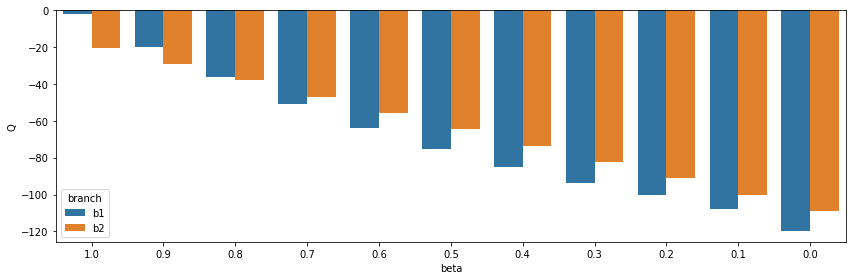

In [2]:
from pandas import DataFrame
from sisyphus import ValueIteration

## Initialize canvas.
fig, ax = plt.subplots(1,1,figsize=(12,4))

## Initialize environment.
gym = DecisionTree()

## Iterate over beta values.
data = []
for beta in np.linspace(1,0,11):

    ## Perform Q-value iteration.
    qvi = ValueIteration(policy='betamax', beta=beta, gamma=0.99)
    qvi = qvi.fit(gym)
    
    data.append( dict(beta=beta, b1=qvi.Q[0], b2=qvi.Q[1]) )
    
## Concatenate.
data = DataFrame(data).melt('beta', var_name='branch', value_name='Q')

sns.barplot('beta', 'Q', 'branch', data=data, order=np.linspace(1,0,11), ax=ax)
ax.set_xticklabels(np.linspace(1,0,11).round(1));
plt.tight_layout()